<h2>Plotting time-height radar data using Py-ART</h2>

In [1]:
import pyart
import os
import matplotlib.pyplot as plt
from matplotlib.dates import num2date, date2num
import netCDF4
import datetime
%matplotlib inline

<b>Ingest data files. The first is a NEXRAD file. The second is KAZR file.
The KAZR file can be found <a href="http://www.archive.arm.gov/discovery/#v/results/s/finst::kazr">here</a></b>

In [2]:
nexf = os.path.join("/Users/guy/data/nexrad/KTLX/nex2/20130520", "KTLX20130520_195111_V06")
#kazf = os.path.join("/Users/guy/data/test/kazr", "enakazrhiC1.a1.20160115.000000_compressed.nc")
kazf = os.path.join("/Users/guy/data/test/kazr", "enakazrhiC1.a1.20160115.000000.custom.nc")

<b>Read in the data. Note that only new KAZR files are cfradial formatted, so here we can use the default read routine. However, older files are different format and likely would require the `aux_io.read_kazr` method.</b>

In [3]:
rnex = pyart.io.read(nexf)

#rkaz = pyart.aux_io.read_kazr(kazf, field_names=kazf_fname)
rkaz = pyart.io.read(kazf)
#nc = netCDF4.Dataset(kazf)
#nc.variables.keys()

<b>Create a display to show what the NEXRAD file looks like.</b>

In [4]:
dnex = pyart.graph.RadarDisplay(rnex)
dkaz = pyart.graph.RadarDisplay(rkaz)

/Users/guy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


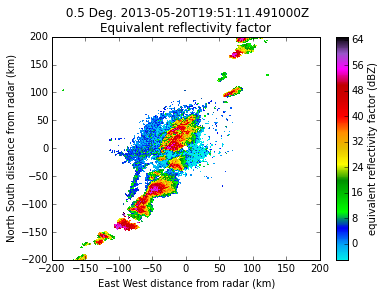

In [5]:
dnex.plot_ppi('reflectivity', 1, cmap=pyart.graph.cm.NWSRef, vmin=-5., vmax=65)
dnex.set_limits(xlim=(-200, 200), ylim=(-200, 200))

<b>We can show that the scan type is unkown when reading the KAZR data. We'll deal with that next.</b>

In [6]:
dkaz.plot('reflectivity', cmap="pyart_LangRainbow12")

ValueError: unknown scan_type other

<b>Convert the NEXRAD radar instance to VPT format and plot.</b>

In [7]:
pyart.core.to_vpt(rnex)
print(rnex.fields.keys())
rnex.time

['differential_phase', 'cross_correlation_ratio', 'spectrum_width', 'reflectivity', 'differential_reflectivity', 'velocity']


/Users/guy/anaconda/lib/python2.7/site-packages/pyart/exceptions.py:59: DepreciatedFunctionName: pyart.core.radar.to_vpt has been depreciated and will be removed in future versions of Py-ART, pleases use pyart.util.radar_utils.to_vpt. 
  old_name, new_name), category=DepreciatedFunctionName)


{'calendar': 'gregorian',
 'comment': 'Coordinate variable for time. Time at the center of each ray, in fractional seconds since the global variable time_coverage_start',
 'data': array([   0.491,    0.513,    0.535, ...,  249.131,  249.162,  249.194]),
 'long_name': 'time_in_seconds_since_volume_start',
 'standard_name': 'time',
 'units': 'seconds since 2013-05-20T19:51:11Z'}

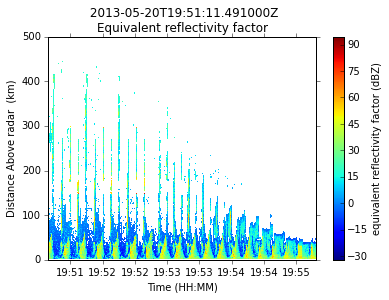

In [8]:
display = pyart.graph.RadarDisplay(rnex)
display.plot_vpt('reflectivity', time_axis_flag=True)

<b>Convert the KAZR radar instance to VPT format and plot.</b>

In [9]:
pyart.util.to_vpt(rkaz)
print(rkaz.fields.keys())
rkaz.time

[u'snr_copol', u'co_to_crosspol_correlation_coeff', u'spectral_width', u'mean_doppler_velocity', u'reflectivity', u'snr_xpol', u'linear_depolarization_ratio']


{u'calendar': u'gregorian',
 u'comment': u'times are relative to the volume start time',
 'data': array([  2.09539000e-01,   2.23703200e+00,   4.26457300e+00, ...,
          8.63948583e+04,   8.63968857e+04,   8.63989133e+04]),
 u'long_name': u'Time offset from midnight',
 u'standard_name': u'time',
 u'units': u'seconds since 2016-01-15 00:00:00 0:00'}

In [10]:
d2 = pyart.graph.RadarDisplay(rkaz)

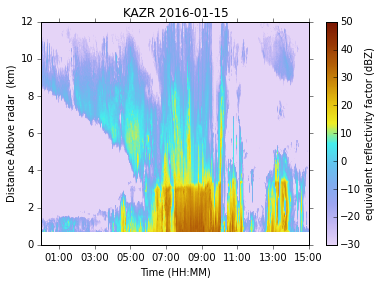

In [11]:
start = date2num(datetime.datetime(2016,1,15,0,0,0))
end = date2num(datetime.datetime(2016,1,15,15,0,0))#,rkaz.time['units'])
#d2.plot_vpt('reflectivity', time_axis_flag=True, cmap='pyart_Carbone42', vmin=-10., vmax=45.)
d2.plot_vpt('reflectivity', time_axis_flag=True, cmap='pyart_LangRainbow12', vmin=-30., vmax=50., title="KAZR 2016-01-15")
d2.set_limits(ylim=(0., 12.), xlim=(start, end))